In [58]:
import pandas as pd

data = pd.read_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/after_extration_data.xlsx")
data01 = pd.DataFrame(data)
data02 = pd.DataFrame(data)
data03 = pd.DataFrame(data)
data04 = pd.DataFrame(data)

In [59]:
data

,BirthRate,FemaleLaborParticipationRate,AvgHoursWorked,FirstBirthAge,MarriageRate,EmploymentRate,UnemploymentRate,HousingPrice,InterestRate,PartTimeRate,...,GDP,GNI,EduExpenditureOfGDP,WeeksPaidLeaveForMothers,TotalLaborParticipationRate,InflationRate,WorkLeisureBalanceIndex,LaborMarketStability,MarriageStabilityIndex,HousingAffordabilityIndex
0,11.8,55.172,1652.679,27.2,5.9,53.930,3.958333,58.583861,8.964167,11.098497,...,19473.072125,19561.545708,4.957250,60.0,67.429,3.261872,24.509914,13.624422,2.809524,23098.466047
1,12.2,55.979,1652.679,27.2,5.7,53.930,3.958333,58.583861,9.463333,11.098497,...,20617.579156,20602.091660,5.103220,112.0,67.959,3.337426,24.318766,13.624422,2.714286,22035.150252
2,12.2,57.604,1652.679,27.3,5.8,54.558,3.958333,58.583861,9.460000,11.098497,...,21293.268400,21345.923456,5.296980,112.0,68.839,4.020847,24.007888,13.783075,2.761905,21572.029041
3,12.0,58.208,1652.679,27.3,5.7,54.281,3.958333,58.583861,7.023334,11.098497,...,21732.871184,21793.075303,5.252000,112.0,68.986,3.631786,23.956730,13.713096,2.714286,21310.688329
4,11.6,61.895,1652.679,27.5,5.5,56.969,4.241667,58.583861,5.117500,11.098497,...,22642.841565,22677.856984,5.340175,112.0,71.342,2.953407,23.165583,13.430804,2.619048,20533.130991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,8.4,71.674,1727.140,31.2,3.3,53.712,9.225000,117.015000,-0.329050,6.440611,...,33044.700150,32269.025353,5.015610,30.1,74.690,1.368614,23.124113,5.822439,1.571429,36615.542110
476,8.5,72.376,1737.704,31.4,3.3,54.978,7.166667,129.032500,-0.322092,6.438755,...,34928.618990,34075.601394,4.675160,30.1,75.145,0.993716,23.124679,7.671348,1.650000,38177.963261
477,8.4,72.901,1743.930,31.4,3.3,55.422,6.675000,141.882500,-0.356333,6.393133,...,37299.182306,36330.275280,4.630020,30.1,75.523,0.338178,23.091376,8.302921,1.650000,39387.314220
478,8.2,71.790,1611.193,31.6,3.3,54.056,7.116667,154.327500,-0.425150,6.030474,...,34955.611560,34411.605571,4.876560,30.1,74.227,-0.012438,21.706293,7.595691,1.941176,45848.642022


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BirthRate                     480 non-null    float64
 1   FemaleLaborParticipationRate  480 non-null    float64
 2   AvgHoursWorked                480 non-null    float64
 3   FirstBirthAge                 480 non-null    float64
 4   MarriageRate                  480 non-null    float64
 5   EmploymentRate                480 non-null    float64
 6   UnemploymentRate              480 non-null    float64
 7   HousingPrice                  480 non-null    float64
 8   InterestRate                  480 non-null    float64
 9   PartTimeRate                  480 non-null    float64
 10  FamilyExpenditure             480 non-null    float64
 11  UnemploymentExpenditure       480 non-null    float64
 12  GDI                           480 non-null    float64
 13  GDP  

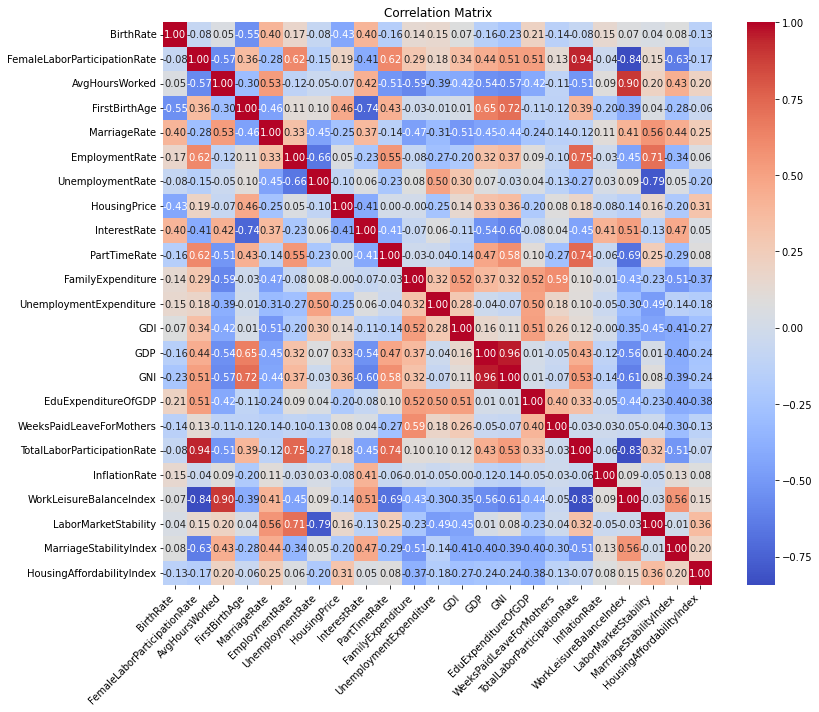

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 제외

- TotalLaborParticipationRate
- WorkLeisureBalanceIndex
- GNI

## 다양한 데이터셋 생성

- LaborMarkeyStability / Unemployment, Employment
- FirstBirthAge / InterestRate

In [62]:
columns01_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'EmploymentRate', 'UnemploymentRate', 'InterestRate']
data01 = data01.drop(columns=columns01_to_exclude)

In [63]:
columns02_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'EmploymentRate', 'UnemploymentRate', 'FirstBirthAge']
data02 = data02.drop(columns=columns02_to_exclude)

In [66]:
columns03_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'LaborMarketStability', 'InterestRate']
data03 = data03.drop(columns=columns03_to_exclude)

In [67]:
columns04_to_exclude = ['TotalLaborParticipationRate', 'WorkLeisureBalanceIndex', 'GNI', 'LaborMarketStability', 'FirstBirthAge']
data04 = data04.drop(columns=columns04_to_exclude)

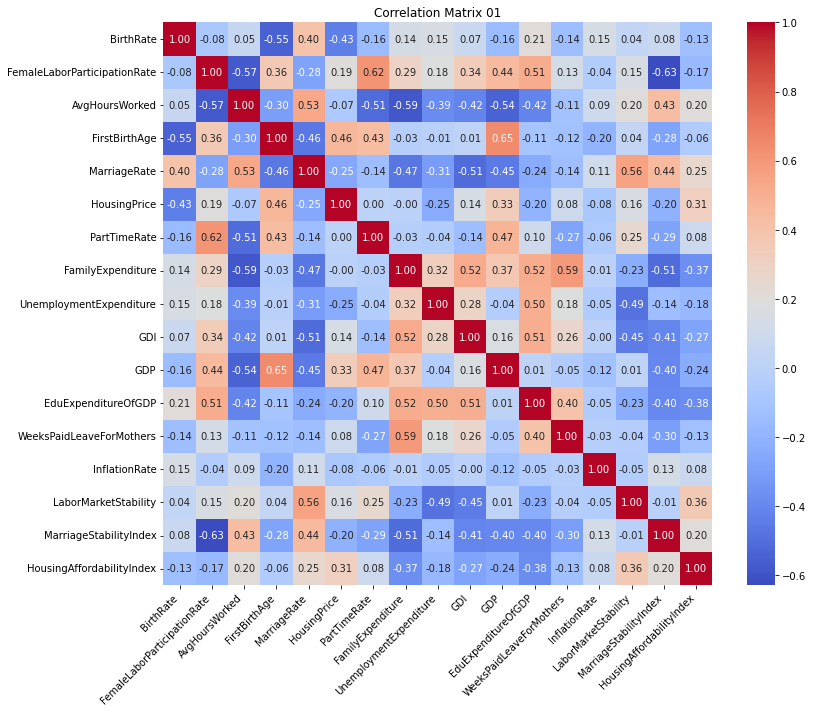

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix01 = data01.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix01, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix01.columns,
            yticklabels=corr_matrix01.columns)
plt.title('Correlation Matrix 01')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

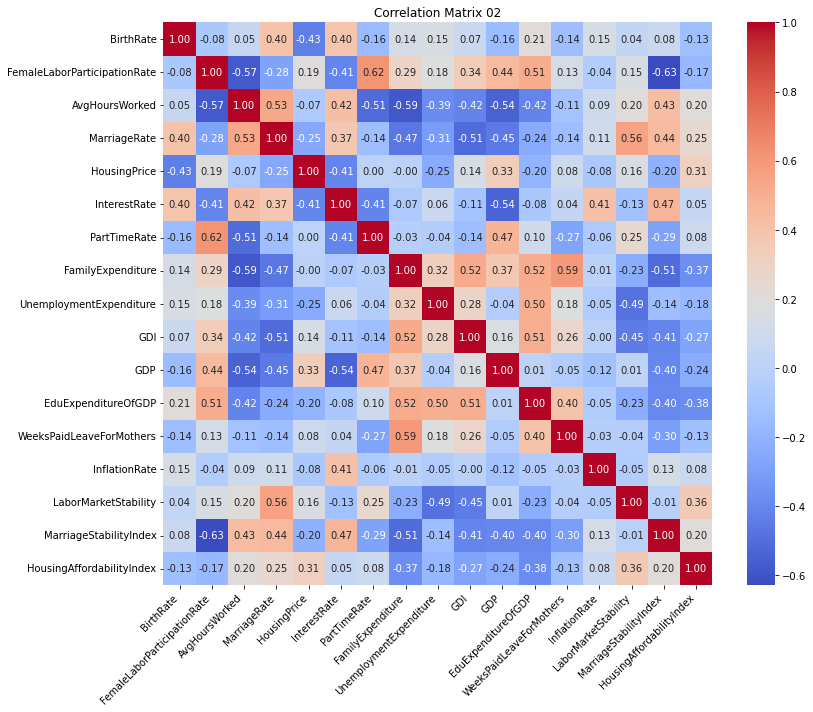

In [69]:
corr_matrix02 = data02.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix02, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix02.columns,
            yticklabels=corr_matrix02.columns)
plt.title('Correlation Matrix 02')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

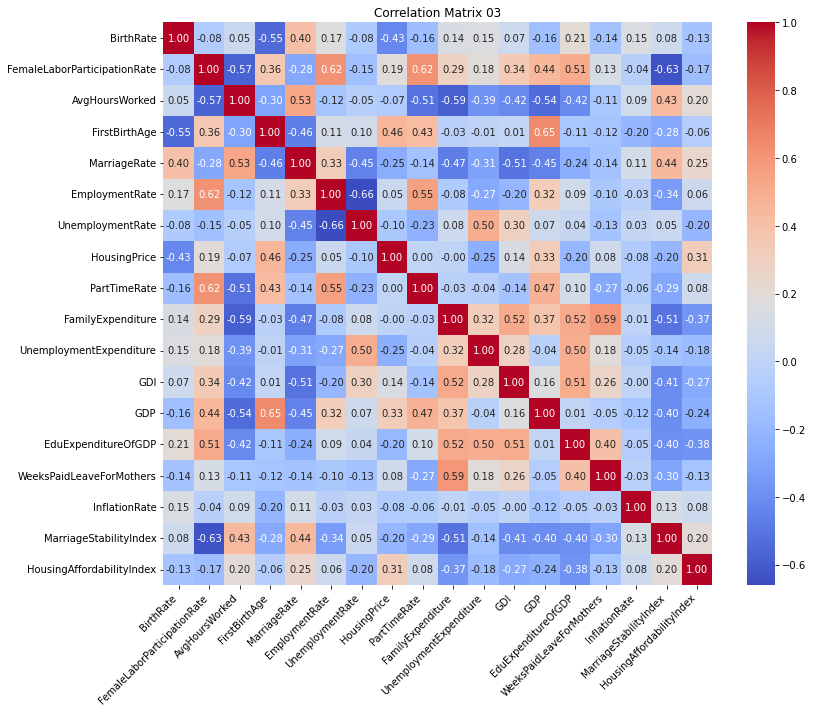

In [70]:
corr_matrix03 = data03.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix03, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix03.columns,
            yticklabels=corr_matrix03.columns)
plt.title('Correlation Matrix 03')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

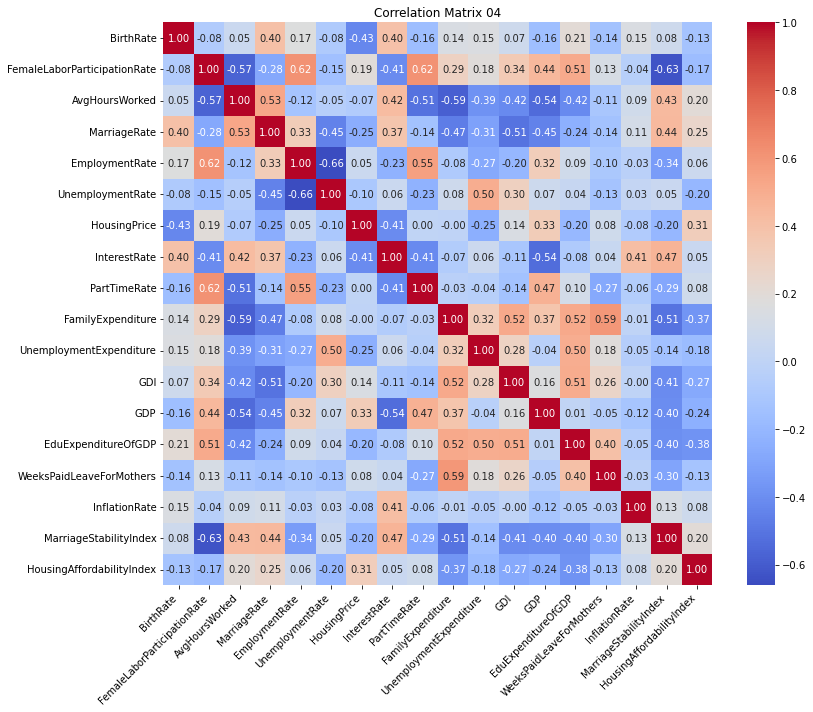

In [71]:
corr_matrix04 = data04.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix04, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix04.columns,
            yticklabels=corr_matrix04.columns)
plt.title('Correlation Matrix 04')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
# Save the DataFrame to an Excel file
data01.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data02.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data03.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)
data04.to_excel("C:/Users/oosedus/Desktop/3-2/Business Analytics/Project/Project/BirthratePrediction/Data/correlation_data01.xlsx", index=False)